In [9]:
# 1. Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# 2. Load the Dataset
# Make sure 'Fertilizer_recommendation.csv' is in the same folder as your notebook
df = pd.read_csv('E:/ドキュメント/AgriSens/Datasets/Fertilizer_recommendation.csv')


In [3]:
# 3. Data Preprocessing
# Separate the features (X) from the target variable (y)
X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']

# One-Hot Encode the categorical features ('Soil Type' and 'Crop Type')
# This converts the text data into a numerical format for the model
X = pd.get_dummies(X, columns=['Soil Type', 'Crop Type'], drop_first=True)

print("\nColumns after one-hot encoding:")
print(X.columns)



Columns after one-hot encoding:
Index(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type_Clayey', 'Soil Type_Loamy', 'Soil Type_Red',
       'Soil Type_Sandy', 'Crop Type_Cotton', 'Crop Type_Ground Nuts',
       'Crop Type_Maize', 'Crop Type_Millets', 'Crop Type_Oil seeds',
       'Crop Type_Paddy', 'Crop Type_Pulses', 'Crop Type_Sugarcane',
       'Crop Type_Tobacco', 'Crop Type_Wheat'],
      dtype='object')


In [4]:
# 4. Split the Data into Training and Testing Sets
# We will use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



Training set size: 79 samples
Testing set size: 20 samples


In [5]:
# 5. Train the Random Forest Model
# Initialize the classifier
fertilizer_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
print("\nTraining the Random Forest model...")
fertilizer_model.fit(X_train, y_train)
print("Model training complete!")


Training the Random Forest model...
Model training complete!


In [6]:
# 6. Evaluate the Model
# Make predictions on the test data
y_pred = fertilizer_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on the test set: {accuracy * 100:.2f}%")


Model Accuracy on the test set: 95.00%


In [7]:
# 7. Save the Trained Model
with open('Fertilizer_rec.pkl', 'wb') as file:
    pickle.dump(fertilizer_model, file)
print("Trained model saved as 'Fertilizer_rec.pkl'")

Trained model saved as 'Fertilizer_rec.pkl'


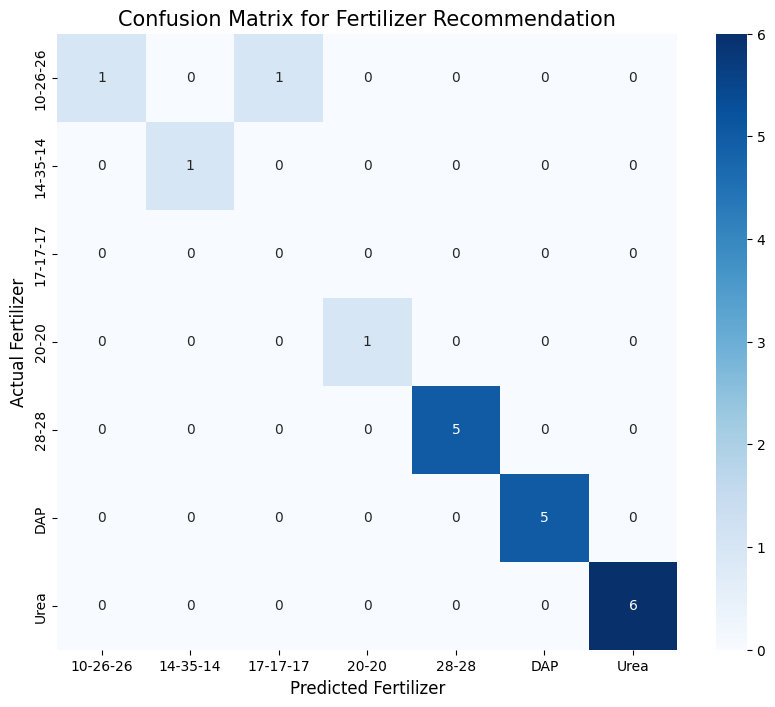

In [10]:
# 7. Generate the Accuracy Graph (Confusion Matrix)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the class names (fertilizer types) from the model
class_names = fertilizer_model.classes_

# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix for Fertilizer Recommendation', fontsize=15)
plt.xlabel('Predicted Fertilizer', fontsize=12)
plt.ylabel('Actual Fertilizer', fontsize=12)
plt.show()